# Explore Kmeans clusters

Clusters analysis is unsupervised learning of grouping a set of objects in such a way that objects in the same cluster are more similar to each other than to those in other clusters. Cluster analysis can be a powerful data-mining tool for any organization that needs to identify discrete groups of customers, sales transactions, or other types of behaviors and things. For example, insurance providers use cluster analysis to detect fraudulent claims, and banks use it for credit scoring.<br>

This article is going to explore the Kmeans algorithm of cluster analysis, which mainly focuses on:<br>
1. The algorithm of Kmeans.<br>
2. A simple example of using Kmeans to grade students score.<br>
3. The algorithm of Kmeans++.<br>
4. Visualizations of Kmeans++ performance.<br>
5. An interesting application to image compression using Kmeans++.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
from kmeans import *
%matplotlib inline
from sklearn.datasets import make_blobs
import seaborn as sns; sns.set()
import time

### 1. The algorithm of Kmeans.

K-Means algorithm establishes the presence of clusters by finding their centroid points. A centroid point is the average of all the data points in the cluster. By iteratively assessing the Euclidean distance between each point in the dataset, each one can be assigned to a cluster. The centroid points are random to begin with and will change each time as the process is carried out. Below are the basic logic of algorithm of Kmeans.<br>
(1) We randomly pick k numbers of points from the whole data set to be our initial centroids. k is the number of clusters we want to obtained.<br>
(2) For each data point in the data set, find the closest centroid to it and assign it to that cluster.<br>
(3) After assigned all the data point to the appropriate cluster, we calculate the mean vectors of each cluster and let them to be our new centroids.<br> 
(4) We need to repeat steps 2 and 3 until the centroids stop changing or the number of iterations has meet the maximum number we set. 

### 2. Using Kmeans to grade students score.

Assuming there are 16 students we need to grade. And we do not want to use the fixed standard of 90 points or more as A, and 80 points or more as B, but identify which students are in the same level. We can use Kmeans cluster in this case.

In [2]:
# Get the fake data
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86,
         85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]

# Define many levels we want to grade
k = 3
grades = np.array(grades).reshape(-1,1)

# Use Kmeans to make clusters
centroids, labels = kmeans(grades, k)
labels = np.array(labels)

# Print our results
centroids_ = centroids.reshape(1,-1)[0]
print("centroids:", [round(x, 2) for x in centroids_])
for j in range(k):
    print("vector assignments:", grades[labels==j].reshape(1,-1))

centroids: [84.07, 92.59, 94.52]
vector assignments: [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
vector assignments: [[92.65 92.26 92.94 92.86 91.79 93.03]]
vector assignments: [[93.87 94.46 95.23]]


From the above results, we can see the 16 students are appropriately assigned into three groups based on their scores.

### 3. The algorithm of Kmeans++.

The only differences of Kmeans++ and Kmeans is the way we get the initial centroids. In Kmeans, we randomly pick k points as initial centroids, while we just randomly pick the first centroid in Kmeans++. The algorithm is as below.<br>
(1) We randomly pick a point in the dataset as our first centroid.<br>
(2) Then we calculate the distances of this point to all the others in the dataset and choose the point having maximum distance from the first point as our second centroid.<br>
(3) We continuously calculate the distances of the all the left points to the centroids and get the minimum distance of each point. Among the min distances to a cluster for each point, find the max distance. The associated point is the new centroid.<br>
(4) We repeat step 3 until we get the number of centroids we want.

### 4. Visualizations of Kmeans++ performance.<br>
Firstly, lets generate some fake data which should belong to 6 group.

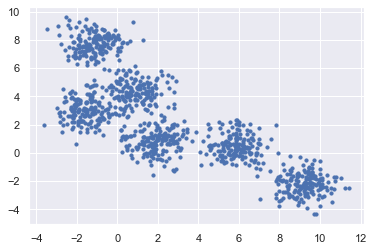

In [3]:
X, y_true = make_blobs(n_samples=1000, centers=6, cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10)

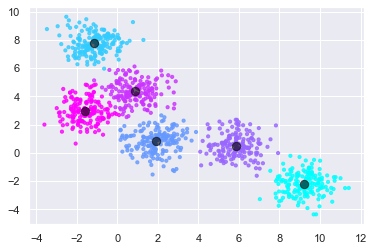

In [4]:
# Fit the model and return the centroids and labels
centroids, labels = kmeans(X, k=6, centroids='kmeans++')

# get the index of data point grouped by labels
index = np.array([i for i in range(len(X))])
labels = np.array(labels)
clusters = []
for i in range(6):
    idx = index[labels == i]
    clusters.append(idx)
    
# flatten the index in the ascending order of labels. (0, 1, 2, 3, 4, 5)
row_index = [y for x in clusters for y in x]

plt.scatter(X[row_index, 0], X[row_index, 1], c= sorted(labels), s=10, cmap='cool',alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.6)  

The big black points in the above plot represent the 6 centroids. We can see Kmeans++ did a great job. Nearly all the point was assigned to the appropriate cluster.<br>


#### Then, let's see what will happen if we do not give Kmeans the right number of clusters.

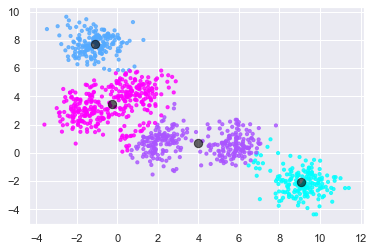

In [5]:
# Fit the model and return the centroids and labels
centroids, labels = kmeans(X, k=4, centroids='kmeans++')

# get the index of data point grouped by labels
index = np.array([i for i in range(len(X))])
labels = np.array(labels)
clusters = []
for i in range(4):
    idx = index[labels == i]
    clusters.append(idx)
    
# flatten the index in the ascending order of labels. (0, 1, 2, 3, 4, 5)
row_index = [y for x in clusters for y in x]

plt.scatter(X[row_index, 0], X[row_index, 1], c= sorted(labels), s=10, cmap='cool',alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.6)  

We can see Kmeans still works well. It gives us a good answer to group the data points belonged to 6 groups into 4 clusters.

### 5. An interesting application to image compression using Kmeans++

By reducing the number of colors used, we can compress pictures. The key is we need to use right color, which can be accomplished with Kmeans.<br>


First try with a picture of my beloved professor, Terence, who taught me how to play in the mud.

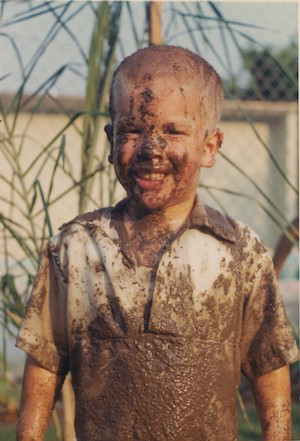

In [6]:
path = 'parrt.jpg'
Image.open(path)

Firstly, we need to get the matrices which represent the colors in the picture and save the original hight and width of the matrices.

In [7]:
image = Image.open(path)
np_image = np.array(image)
h = np_image.shape[0]
w = np_image.shape[1]

There are 3 seperate matrices for colours Red, Blue, Green.

In [8]:
data = np_image.reshape(np_image.shape[0] * np_image.shape[1],np_image.shape[2])
data.shape

(132300, 3)

Transfer the pixel matrices into 4 colors matrices and store the result into img_.

In [9]:
k=4
start = time.time()
centroids, labels = kmeans(data, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points
img_ = Image.fromarray(X.reshape(h,w,3))
end = time.time()
print(f"Runtime of this process is {end - start}")

Runtime of this process is 45.5038948059082


We can the total runtime is 45s. <br>
Let's see the comparison of two photos.

Text(0.5, 1.0, '4-color Image')

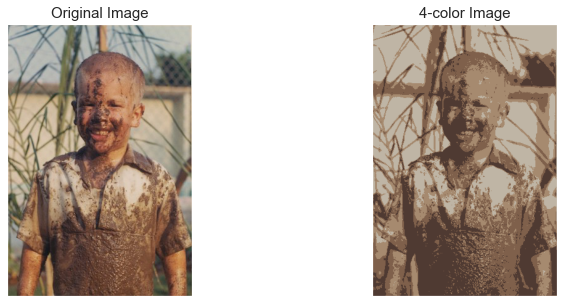

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image)
ax[0].set_title('Original Image', size=15)
ax[1].imshow(img_)
ax[1].set_title(f'{k}-color Image', size=15)

#### Lastly, let's see a more fancy experiment with another picture of Terence

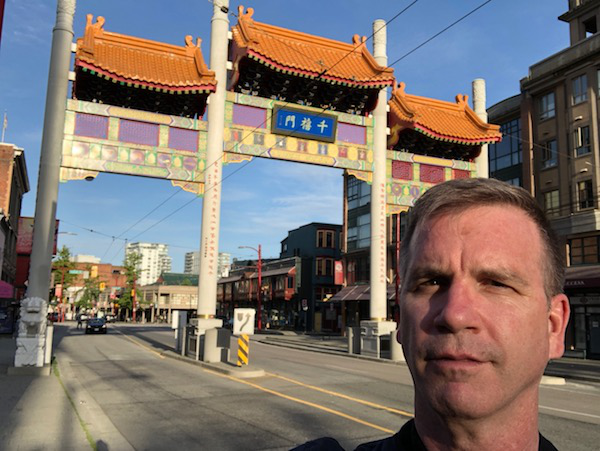

In [11]:
path = 'parrt-vancouver.jpg'
Image.open(path)

In [12]:
img = Image.open(path)
np_img = np.array(img)
h = np_img.shape[0]
w = np_img.shape[1]
data = np_img.reshape(np_img.shape[0] * np_img.shape[1],np_img.shape[2])

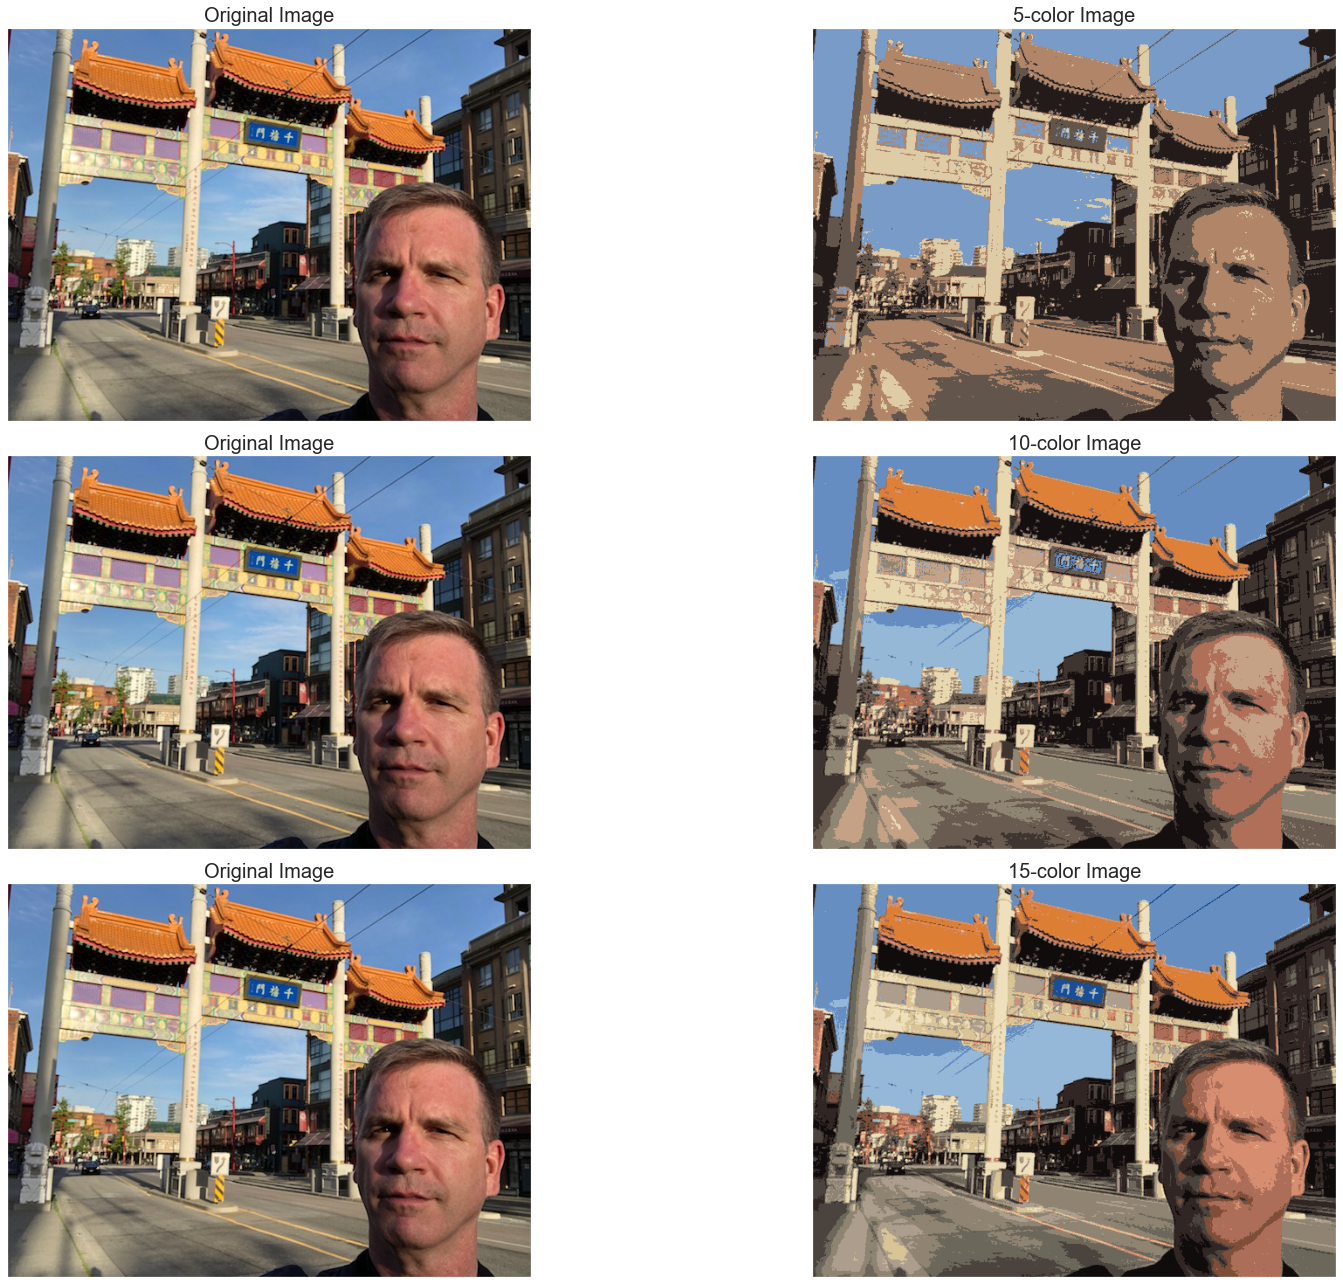

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(30, 18), subplot_kw=dict(xticks=[], yticks=[]))
for idx, no_colours in enumerate([5,10,15]):
    centroids, labels = kmeans(data, k=no_colours, centroids='kmeans++', tolerance=.01)
    centroids = centroids.astype(np.uint8)
    X = centroids[labels] # reassign all points
    img_ = Image.fromarray(X.reshape(h,w,3))
    ax[idx, 0].imshow(img)
    ax[idx, 0].set_title('Original Image', size=20)
    ax[idx, 1].imshow(img_)
    ax[idx, 1].set_title(f'{no_colours}-color Image', size=20)
    plt.tight_layout()

#### Other ways to implement cluster analysis

Apart from Kmeans, there are also other ways to do cluster analysis, such as spectral clustering and Breiman's Proximity matrix from random forests